In [2]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": -27.5967,
	"longitude": -48.5492,
	"hourly": ["windspeed_1000hPa", "windspeed_975hPa", "windspeed_950hPa", "windspeed_925hPa", "windspeed_900hPa", "windspeed_850hPa", "winddirection_1000hPa", "winddirection_975hPa", "winddirection_950hPa", "winddirection_925hPa", "winddirection_900hPa", "winddirection_850hPa", "geopotential_height_1000hPa", "geopotential_height_975hPa", "geopotential_height_950hPa", "geopotential_height_925hPa", "geopotential_height_900hPa", "geopotential_height_850hPa"],
	"forecast_days": 16,
	"models": "ecmwf_ifs04"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_windspeed_1000hPa = hourly.Variables(0).ValuesAsNumpy()
hourly_windspeed_975hPa = hourly.Variables(1).ValuesAsNumpy()
hourly_windspeed_950hPa = hourly.Variables(2).ValuesAsNumpy()
hourly_windspeed_925hPa = hourly.Variables(3).ValuesAsNumpy()
hourly_windspeed_900hPa = hourly.Variables(4).ValuesAsNumpy()
hourly_windspeed_850hPa = hourly.Variables(5).ValuesAsNumpy()
hourly_winddirection_1000hPa = hourly.Variables(6).ValuesAsNumpy()
hourly_winddirection_975hPa = hourly.Variables(7).ValuesAsNumpy()
hourly_winddirection_950hPa = hourly.Variables(8).ValuesAsNumpy()






hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["windspeed_1000hPa"] = hourly_windspeed_1000hPa
hourly_data["windspeed_975hPa"] = hourly_windspeed_975hPa
hourly_data["windspeed_950hPa"] = hourly_windspeed_950hPa
hourly_data["windspeed_925hPa"] = hourly_windspeed_925hPa
hourly_data["windspeed_900hPa"] = hourly_windspeed_900hPa
hourly_data["windspeed_850hPa"] = hourly_windspeed_850hPa
hourly_data["winddirection_1000hPa"] = hourly_winddirection_1000hPa
hourly_data["winddirection_975hPa"] = hourly_winddirection_975hPa
hourly_data["winddirection_950hPa"] = hourly_winddirection_950hPa


hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)


Coordinates -27.200000762939453°N -48.80000305175781°E
Elevation 16.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                         date  windspeed_1000hPa  windspeed_975hPa  \
0   2024-03-18 00:00:00+00:00           7.200000         18.847641   
1   2024-03-18 01:00:00+00:00           5.692099         20.377399   
2   2024-03-18 02:00:00+00:00           3.877318         20.674156   
3   2024-03-18 03:00:00+00:00           2.902413         20.240198   
4   2024-03-18 04:00:00+00:00           3.240000         18.626305   
..                        ...                ...               ...   
379 2024-04-02 19:00:00+00:00                NaN               NaN   
380 2024-04-02 20:00:00+00:00                NaN               NaN   
381 2024-04-02 21:00:00+00:00                NaN               NaN   
382 2024-04-02 22:00:00+00:00                NaN               NaN   
383 2024-04-02 23:00:00+00:00                NaN               NaN   

     windspeed_950hPa  windspee

In [26]:
# Load the data
data = pd.read_csv(filename)

# Print the first few records of the DataFrame
print(data.head())

  date;windspeed_1000hPa;windspeed_975hPa;windspeed_950hPa;windspeed_925hPa;windspeed_900hPa;windspeed_850hPa;winddirection_1000hPa;winddirection_975hPa;winddirection_950hPa
0  2024-03-18 00:00:00+00:00;7.2;18.847641;8.4042...                                                                                                                         
1  2024-03-18 01:00:00+00:00;5.692099;20.3774;4.1...                                                                                                                         
2  2024-03-18 02:00:00+00:00;3.8773184;20.674156;...                                                                                                                         
3  2024-03-18 03:00:00+00:00;2.9024127;20.240198;...                                                                                                                         
4  2024-03-18 04:00:00+00:00;3.2399998;18.626305;...                                                                              

In [7]:
print(hourly_dataframe.columns)

Index(['date', 'windspeed_1000hPa', 'windspeed_975hPa', 'windspeed_950hPa',
       'windspeed_925hPa', 'windspeed_900hPa', 'windspeed_850hPa',
       'winddirection_1000hPa', 'winddirection_975hPa',
       'winddirection_950hPa'],
      dtype='object')


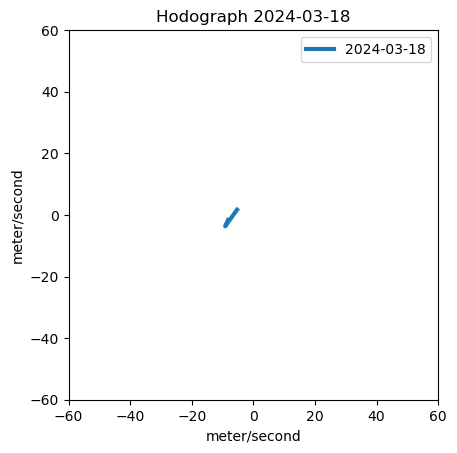

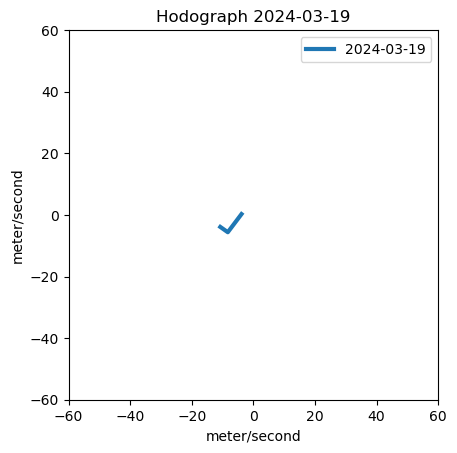

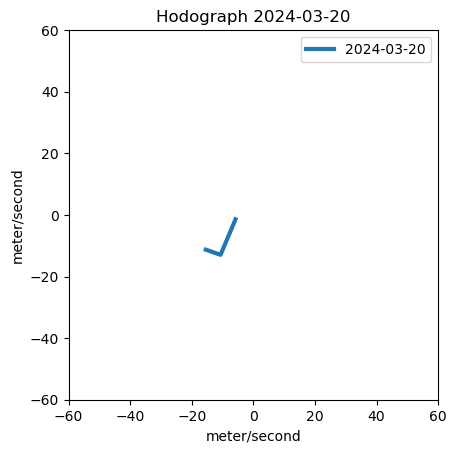

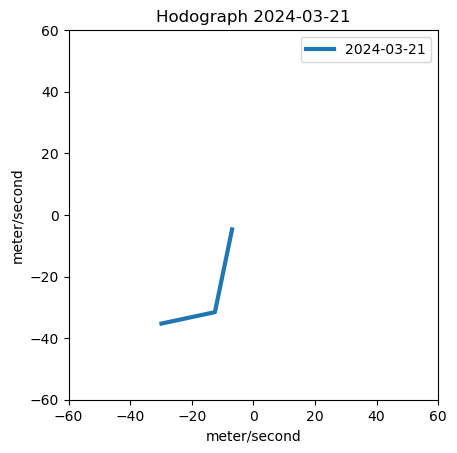

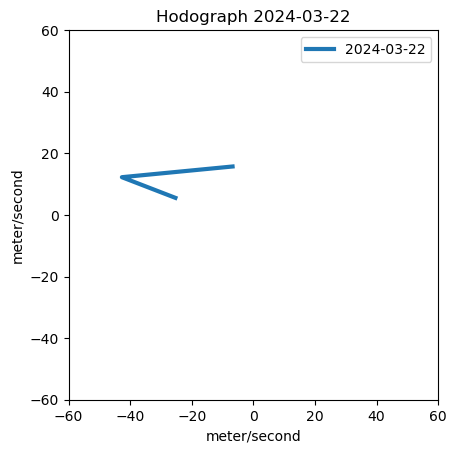

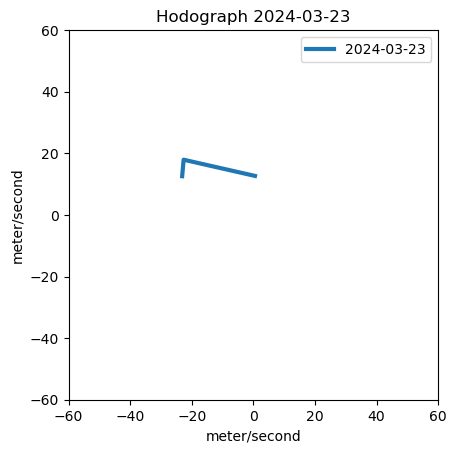

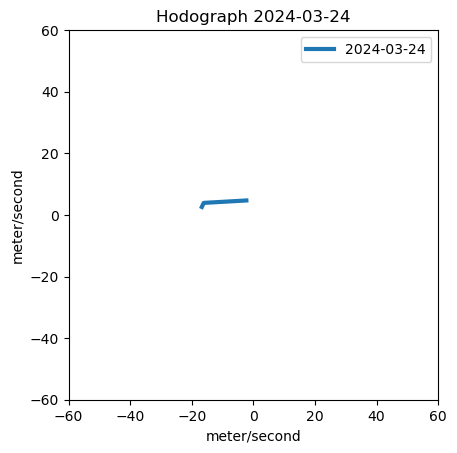

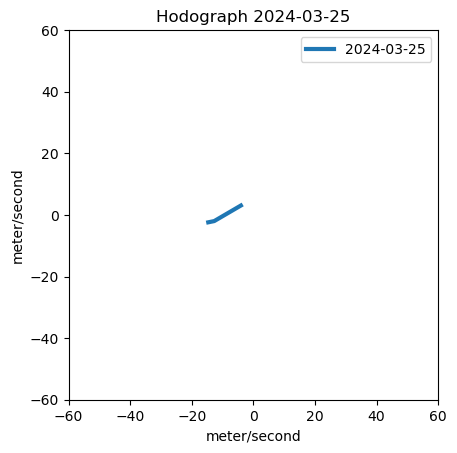

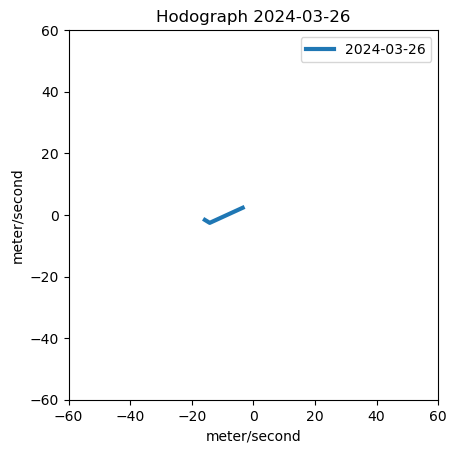

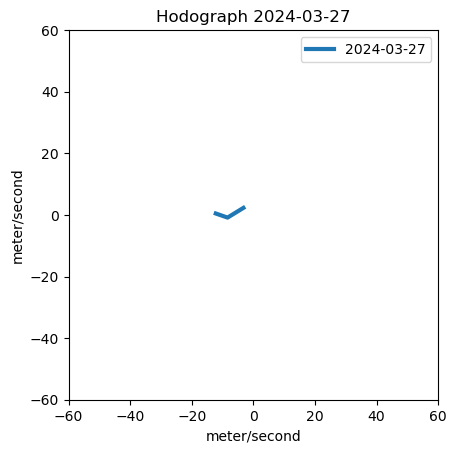

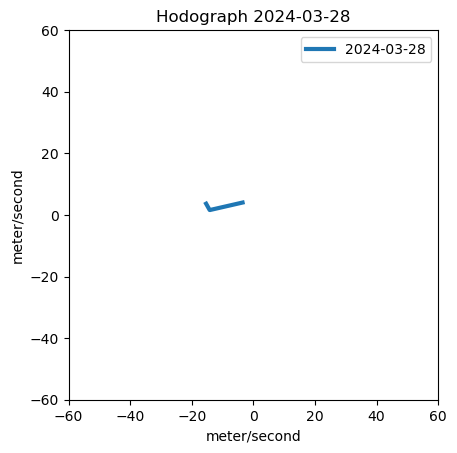

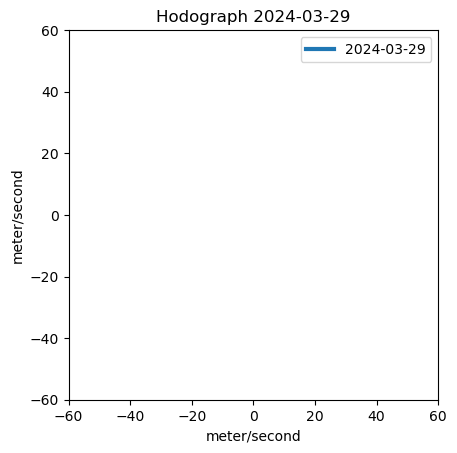

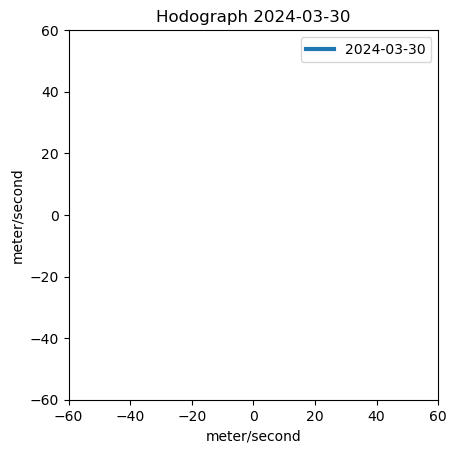

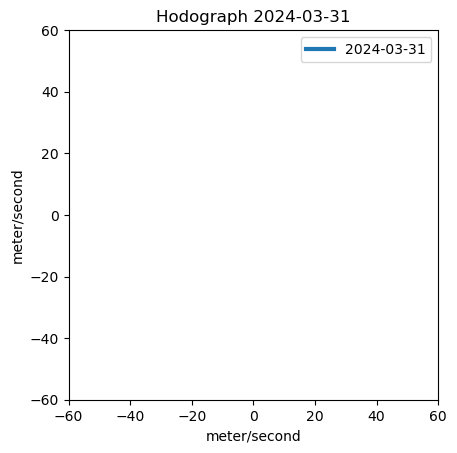

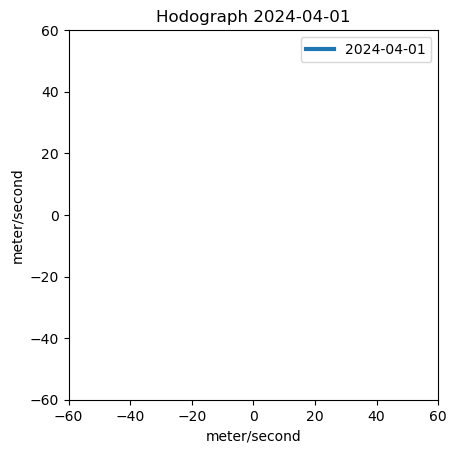

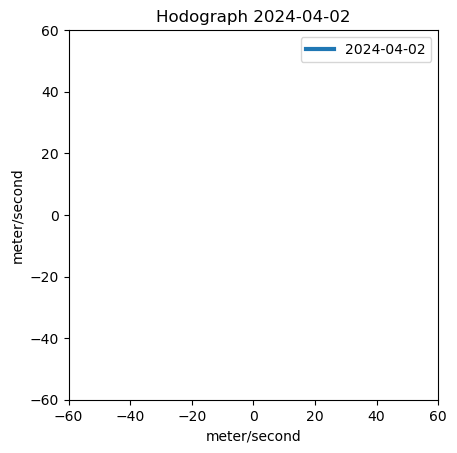

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from metpy.plots import Hodograph
from metpy.units import units

# Convert wind speed and direction to u and v components
def wind_components(speed, direction):
    u = -speed * np.sin(np.deg2rad(direction))
    v = -speed * np.cos(np.deg2rad(direction))
    return u, v

# Loop over each day
for date in hourly_dataframe['date'].dt.date.unique():
    # Select data for this day
    daily_data = hourly_dataframe[hourly_dataframe['date'].dt.date == date]
    
    # Create a new figure
    fig, ax = plt.subplots()

    # Create a hodograph
    h = Hodograph(ax, component_range=60.)

    # Prepare arrays for hodograph
    u = []
    v = []
    
    # Loop over each pressure level
    for pressure in ['1000hPa', '975hPa', '950hPa']:
        # Get wind speed and direction
        ws = daily_data[f'windspeed_{pressure}'].mean()
        wd = daily_data[f'winddirection_{pressure}'].mean()
        
        # Convert to u and v components
        u_comp, v_comp = wind_components(ws, wd)
        
        # Append to the hodograph data
        u.append(u_comp)
        v.append(v_comp)
        
    # Plot the hodograph
    h.plot(u * units('m/s'), v * units('m/s'), label=date)
    
    # Set the title
    ax.set_title(f"Hodograph {date}")
    
    # Add a legend
    ax.legend()
    
    # Show the figure
    plt.show()

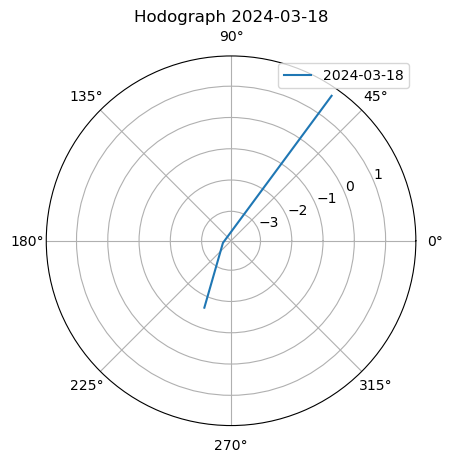

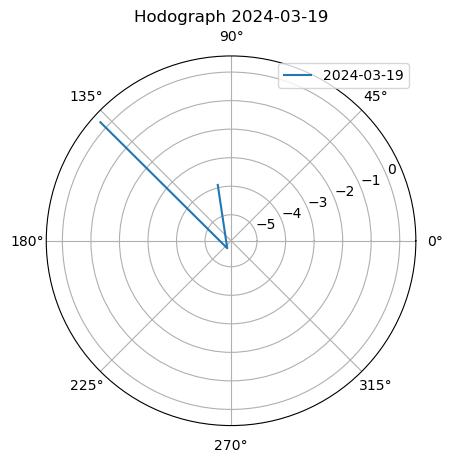

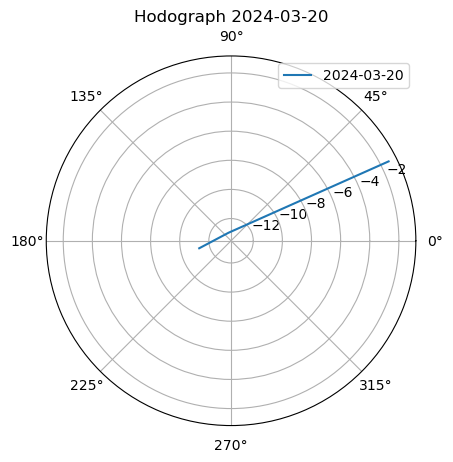

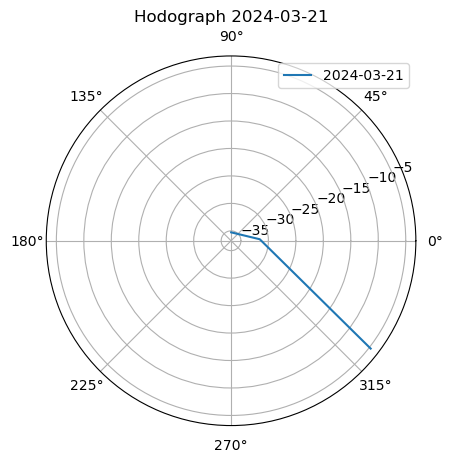

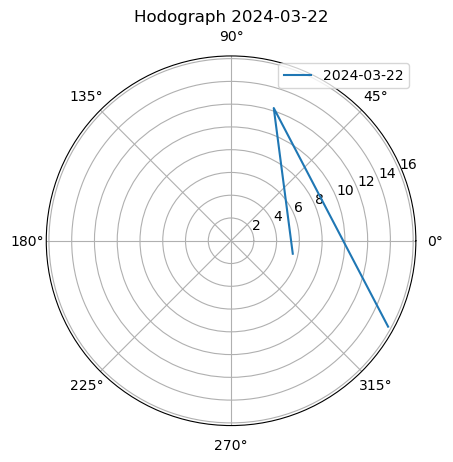

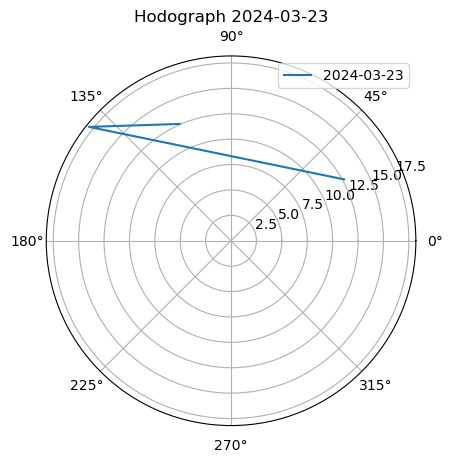

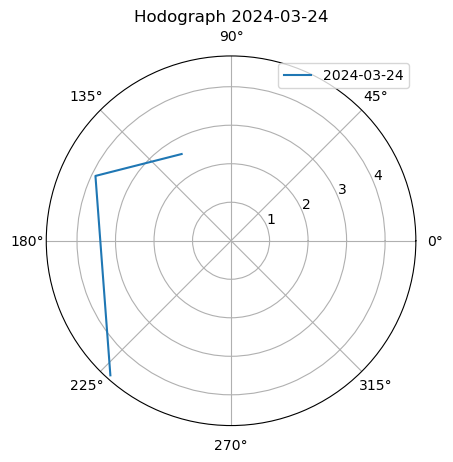

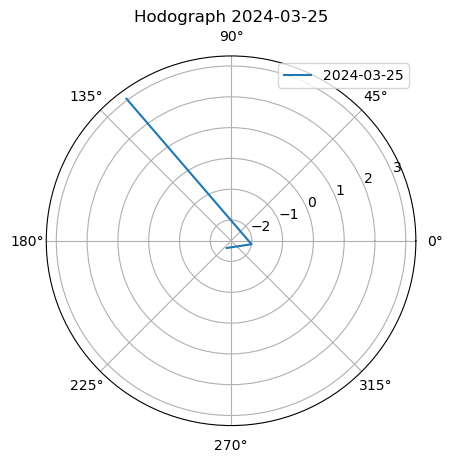

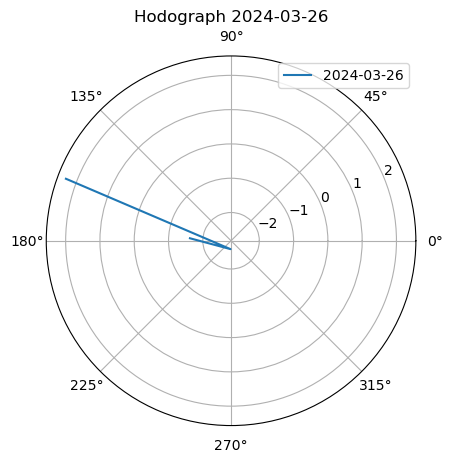

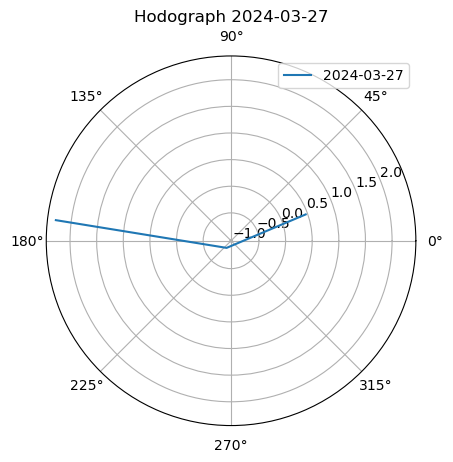

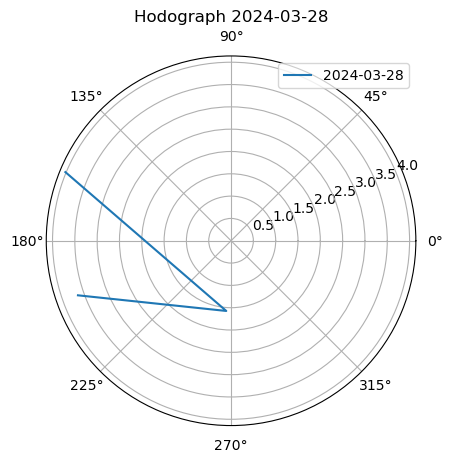

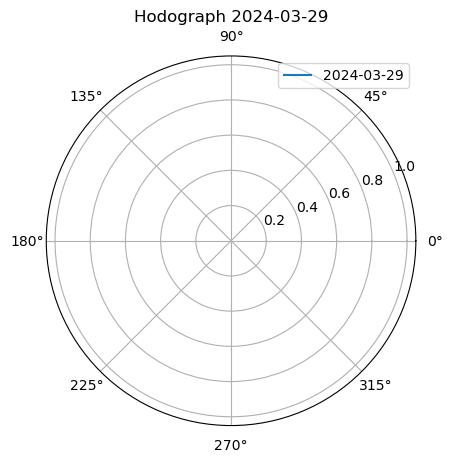

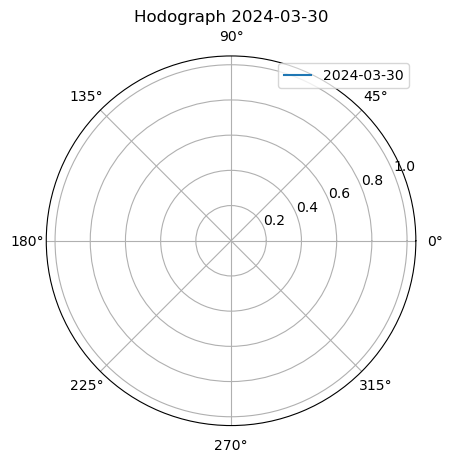

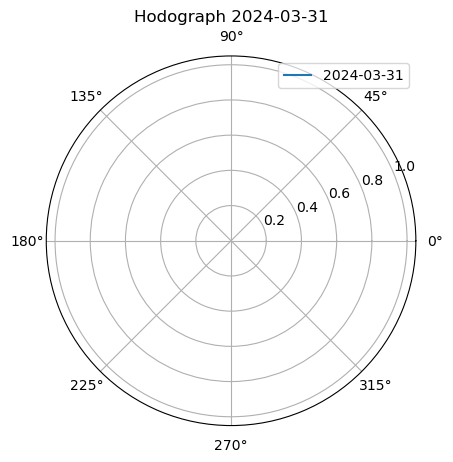

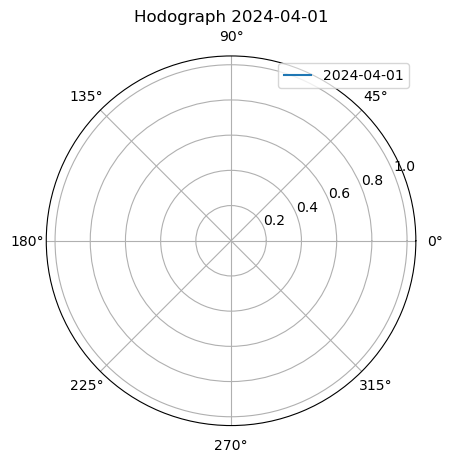

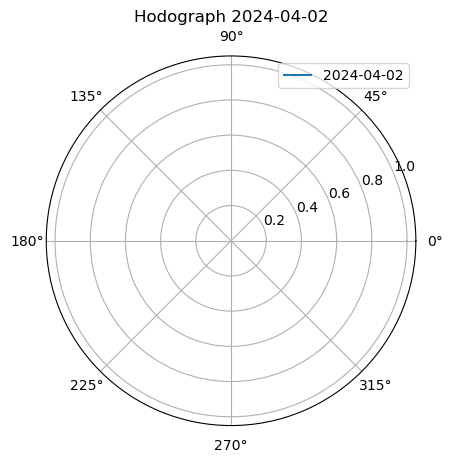

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Convert wind speed and direction to u and v components
def wind_components(speed, direction):
    u = -speed * np.sin(np.deg2rad(direction))
    v = -speed * np.cos(np.deg2rad(direction))
    return u, v

# Loop over each day
for date in hourly_dataframe['date'].dt.date.unique():
    # Select data for this day
    daily_data = hourly_dataframe[hourly_dataframe['date'].dt.date == date]
    
    # Create a new figure
    fig = plt.figure()

    # Create a polar subplot
    ax = fig.add_subplot(111, polar=True)

    # Prepare arrays for hodograph
    u = []
    v = []
    
    # Loop over each pressure level
    for pressure in ['1000hPa', '975hPa', '950hPa']:
        # Get wind speed and direction
        ws = daily_data[f'windspeed_{pressure}'].mean()
        wd = daily_data[f'winddirection_{pressure}'].mean()
        
        # Convert to u and v components
        u_comp, v_comp = wind_components(ws, wd)
        
        # Append to the hodograph data
        u.append(u_comp)
        v.append(v_comp)
        
    # Plot the hodograph
    ax.plot(u, v, label=date)
    
    # Set the title
    ax.set_title(f"Hodograph {date}")
    
    # Add a legend
    ax.legend()
    
    # Show the figure
    plt.show()